In [1]:
#!pip3 install pandas matplotlib sklearn --user

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as pyplot
import numpy as np

# The path to the file
filename = "./data/breast-cancer-wisconsin.data"
column_names = ['id', 'thickness', 'cell-size', 'cell-shape', 'adhesion', 'epithelial-size', 'nuclei', 'chromatin', 'nucleoli', 'mitosis', 'class']

# load the file
data = pd.read_csv(filename, names=column_names)

# Print the shape of the data here
print(data.shape)

(699, 11)


In [3]:
# Check the types of each column
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   thickness        699 non-null    int64 
 2   cell-size        699 non-null    int64 
 3   cell-shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithelial-size  699 non-null    int64 
 6   nuclei           699 non-null    object
 7   chromatin        699 non-null    int64 
 8   nucleoli         699 non-null    int64 
 9   mitosis          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None


In [4]:
# replace '?' with NaN
data = data.replace('?', np.NAN)

# drop rows with missing values
data_dropped = data.dropna(axis=0, subset='nuclei')
# convert column back to int64
data_dropped = data_dropped.astype({'nuclei': 'int64'})
print(data_dropped.info())

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               683 non-null    int64
 1   thickness        683 non-null    int64
 2   cell-size        683 non-null    int64
 3   cell-shape       683 non-null    int64
 4   adhesion         683 non-null    int64
 5   epithelial-size  683 non-null    int64
 6   nuclei           683 non-null    int64
 7   chromatin        683 non-null    int64
 8   nucleoli         683 non-null    int64
 9   mitosis          683 non-null    int64
 10  class            683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB
None


In [5]:
# Look at the size of each class instance
class_counts = data_dropped.groupby('class').size()
print(class_counts)

class
2    444
4    239
dtype: int64


In [6]:
# Get the correlation matrix
correlations = data_dropped.corr(method='pearson')
print(correlations)

                       id  thickness  cell-size  cell-shape  adhesion   
id               1.000000  -0.056350  -0.041396   -0.042221 -0.069630  \
thickness       -0.056350   1.000000   0.642481    0.653470  0.487829   
cell-size       -0.041396   0.642481   1.000000    0.907228  0.706977   
cell-shape      -0.042221   0.653470   0.907228    1.000000  0.685948   
adhesion        -0.069630   0.487829   0.706977    0.685948  1.000000   
epithelial-size -0.048644   0.523596   0.753544    0.722462  0.594548   
nuclei          -0.099248   0.593091   0.691709    0.713878  0.670648   
chromatin       -0.061966   0.553742   0.755559    0.735344  0.668567   
nucleoli        -0.050699   0.534066   0.719346    0.717963  0.603121   
mitosis         -0.037972   0.350957   0.460755    0.441258  0.418898   
class           -0.084701   0.714790   0.820801    0.821891  0.706294   

                 epithelial-size    nuclei  chromatin  nucleoli   mitosis   
id                     -0.048644 -0.099248  -0

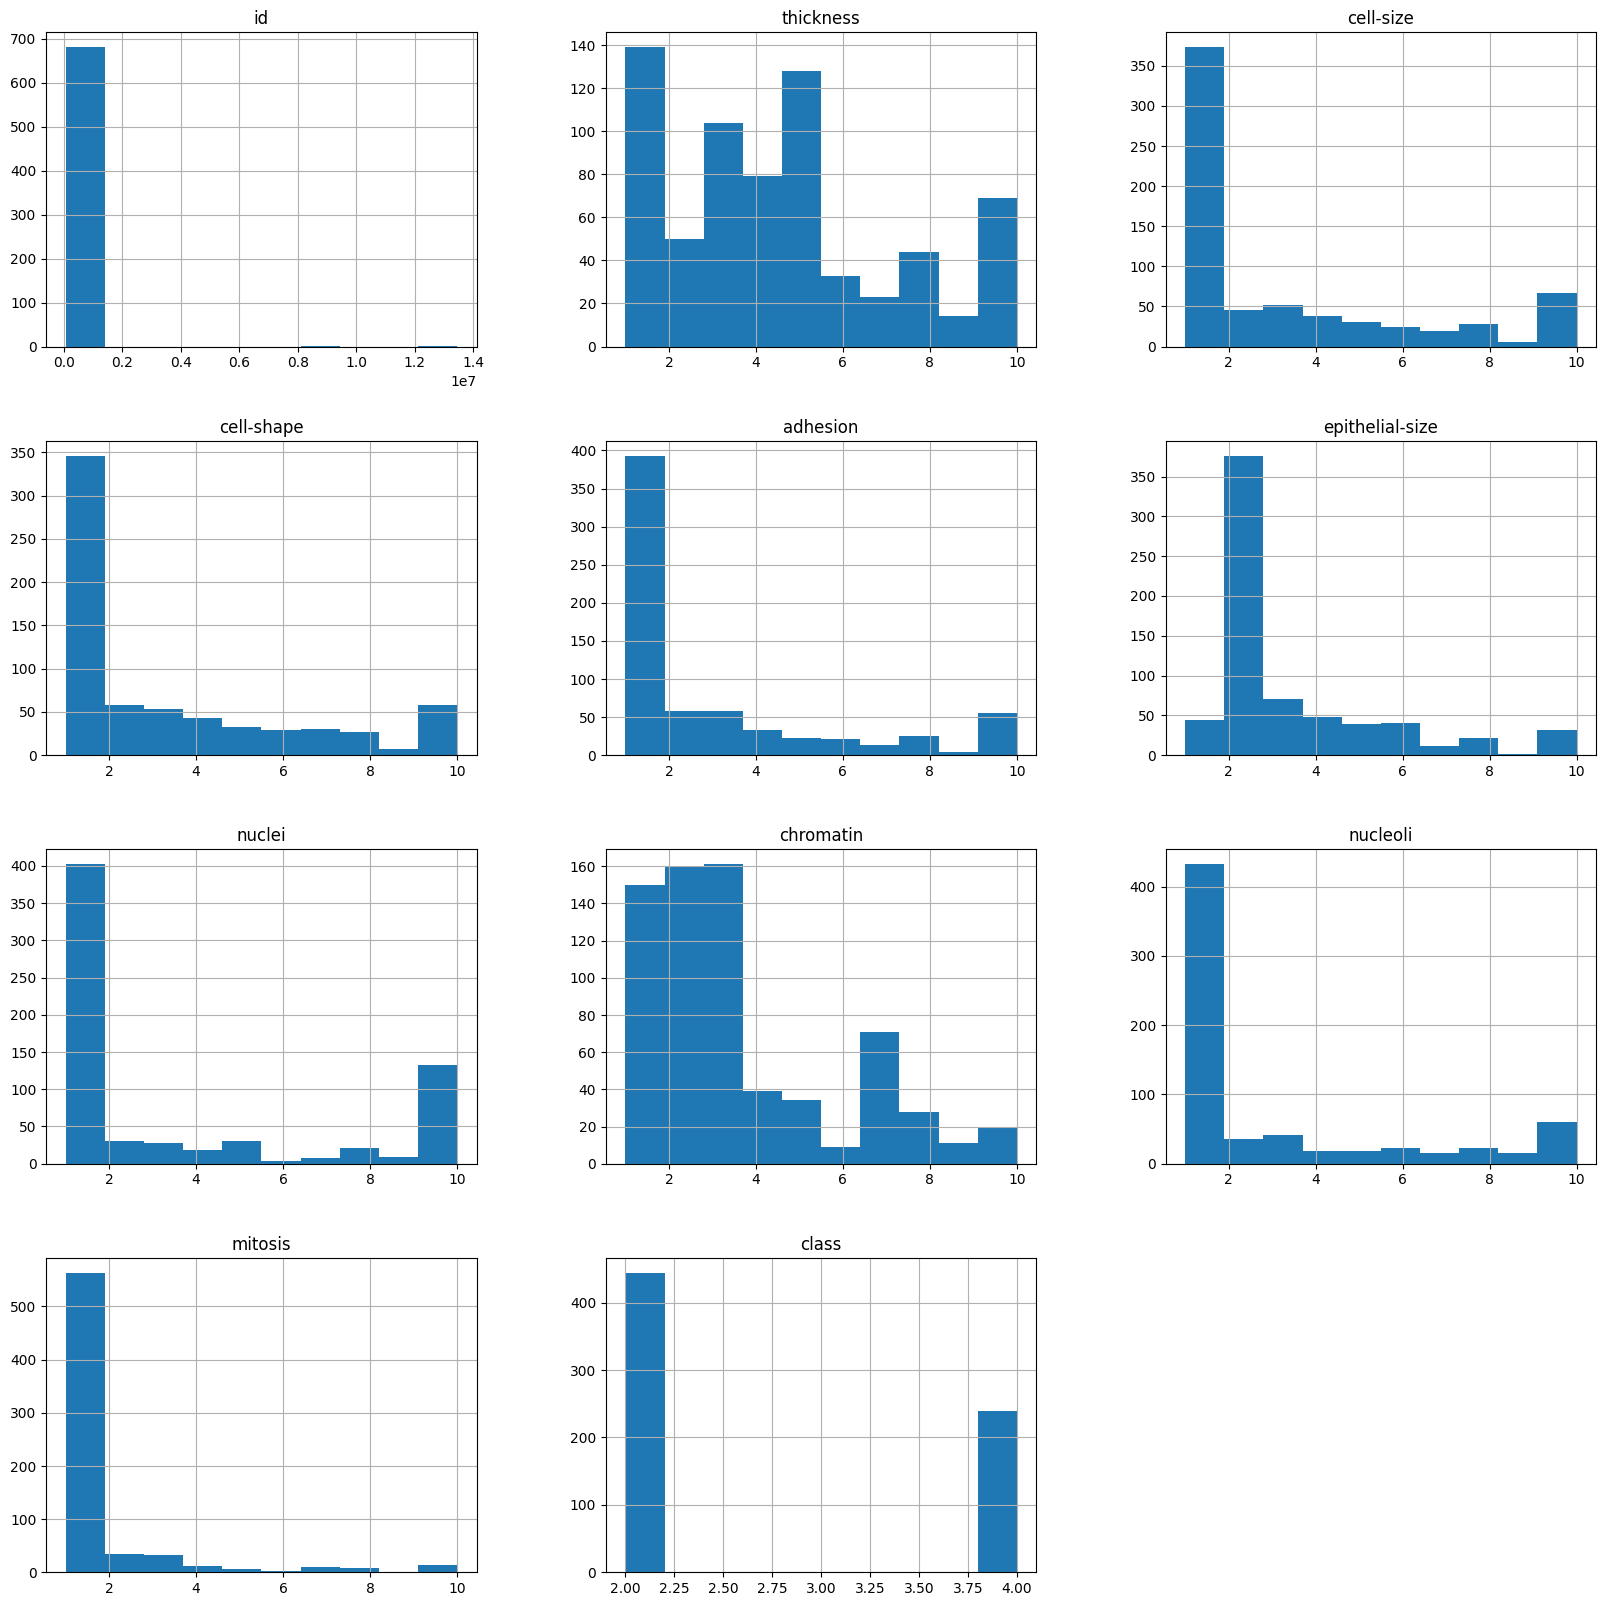

In [7]:
# Create histograms for each feature
data_dropped.hist(figsize=[20, 20])
pyplot.show()

In [8]:
# filter the numbers
filter_names = ['thickness', 'cell-size', 'cell-shape', 'adhesion', 'epithelial-size', 'nuclei', 'chromatin', 'nucleoli', 'mitosis', 'class']

# Select the columns from the filter
df = data_dropped[filter_names]  # df = dropped filtered

# Create an array of the values
array = df.values

# separate array into X and Y
X = array[:,0:df.shape[1]-1]
Y = array[:,df.shape[1]-1]

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a model to test with RFE
model = LogisticRegression(solver='liblinear')

# fit RFE with model
rfe = RFE(model)
fit = rfe.fit(X, Y)

print(f'Num Features: {fit.n_features_}')
print(f'The feature labels: {filter_names[:len(filter_names) - 1]}')
print(f'Selected Features: {fit.support_}')
print(f'Feature Ranking: {fit.ranking_}')

Num Features: 4
The feature labels: ['thickness', 'cell-size', 'cell-shape', 'adhesion', 'epithelial-size', 'nuclei', 'chromatin', 'nucleoli', 'mitosis']
Selected Features: [False False  True False False  True  True False  True]
Feature Ranking: [2 5 1 4 6 1 1 3 1]


In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction with K Best
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# summarize scores
print(fit.scores_)

[ 624.13570418 1370.06458731 1279.76770412  986.41787922  497.53676321
 1729.0661744   682.97823856 1143.8667119   228.99434634]


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# prepare models
models = [('LR', LogisticRegression(solver='liblinear')), ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()), ('SVM', SVC()), ('NB', GaussianNB())]

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
seed = 7
test_size = 0.33
n_splits = 10

# Split test and train variables
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

# Train/test Accuracies
print('Train/Test Accuracies:')
for name, model in models:
   model.fit(X_train, Y_train)
   fit_score = model.score(X_test, Y_test)
   results.append(fit_score)
   names.append(name)
   print(f'{name}: {fit_score * 100:.3f}')

# K Fold Accuracies
print('\nKFold Accuracies:')
for name, model in models:
   kfold = KFold(n_splits=n_splits, random_state=seed, shuffle=True)
   cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   print(f'{name}: {cv_results.mean() * 100:.3f} ({cv_results.std() * 100:.3f})')

# Shuffle Split Accuracies
print('\nShuffleSplit Accuracies:')
for name, model in models:
   kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
   cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   print(f'{name}: {cv_results.mean() * 100:.3f} ({cv_results.std() * 100:.3f})')

Train/Test Accuracies:
LR: 96.903
RF: 97.345
KNN: 97.345
SVM: 96.903
NB: 97.788

KFold Accuracies:
LR: 96.488 (2.197)
RF: 97.361 (2.160)
KNN: 97.364 (1.708)
SVM: 96.777 (1.950)
NB: 96.334 (2.809)

ShuffleSplit Accuracies:
LR: 96.637 (0.889)
RF: 96.947 (1.274)
KNN: 97.212 (1.138)
SVM: 96.858 (0.873)
NB: 95.929 (1.478)


In [13]:
# Cross Validation Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Confusion Matrix order:
# True Positive  | False Negative
# -------------------------------
# False Positive | True Negative

# Reports for each model
for name, model in models:
   model.fit(X_train, Y_train)
   predicted = model.predict(X_test)
   report = classification_report(Y_test, predicted)
   matrix = confusion_matrix(Y_test, predicted)
   print(f'{name} Report:\n{report}')
   print(f'{name} Confusion Matrix:\n{matrix}\n')

LR Report:
              precision    recall  f1-score   support

           2       0.99      0.96      0.98       142
           4       0.94      0.98      0.96        84

    accuracy                           0.97       226
   macro avg       0.96      0.97      0.97       226
weighted avg       0.97      0.97      0.97       226

LR Confusion Matrix:
[[137   5]
 [  2  82]]

RF Report:
              precision    recall  f1-score   support

           2       0.99      0.97      0.98       142
           4       0.95      0.99      0.97        84

    accuracy                           0.98       226
   macro avg       0.97      0.98      0.98       226
weighted avg       0.98      0.98      0.98       226

RF Confusion Matrix:
[[138   4]
 [  1  83]]

KNN Report:
              precision    recall  f1-score   support

           2       0.99      0.96      0.98       142
           4       0.94      0.99      0.97        84

    accuracy                           0.97       226
   m

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

# create feature union list
features = []
# add features for each model
for name, model in models:
   features.append((f'rfe_{name}', RFE(model, n_features_to_select=4)))
features.append(('select_best', SelectKBest(score_func=chi2, k=4)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
for name, model in models:
   estimators.append(('feature_union', feature_union))
   estimators.append((name, model))
   pipe = Pipeline(estimators)

   # evaluate pipeline
   kfold = KFold(n_splits=n_splits, random_state=seed, shuffle=True)
   results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

   print(f'{name}: {results.mean() * 100:.3f} ({results.std() * 100:.3f})')
   estimators.clear()

LR: 96.488 (2.197)
RF: 96.630 (1.866)
KNN: 97.364 (1.708)
SVM: 96.777 (1.950)
NB: 96.334 (2.809)
